In [1]:
#Coding for Scrapping Inventory By Location (PNT YARD) Data in Data Marts

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plot
import seaborn as sb
import datetime as dt
%matplotlib inline
os.chdir("C:\\Users\\ullahm2\\Downloads") 
cwd = os.getcwd() 
print (cwd)
import tkinter as tk
from tkinter.filedialog import askopenfilename
root = tk.Tk()
root.withdraw() #Prevents the Tkinter window to come up
exlpath = askopenfilename()
root.destroy()
print(exlpath)
df = pd.read_csv(exlpath)

C:\Users\ullahm2\Downloads
C:/Users/ullahm2/Downloads/PROD-SanfordPartBuffer (24).csv


In [2]:
df 

,REV,SUPPLY,PO,FIRM_FORECAST,SUPPLY_QTY,SHIP_DATE,RECEIVING_DATE,AVAILABLE_DATE,TIME_NEEDED,SUB_ASSEMBLY_DATE,SLOT,MODEL,MAS_LOC,DEMAND_ORDERS,WO_XREF,DEMAND_QTY,BOH,BOH_WO_SS
0,1,2795377-01-JA,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JA,**BOH**,NaN,NaN,4,13
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021,NaN,30.0,272D3,JA,F9GGM,5773792,1.0,3,12
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/30/2021,NaN,30.0,272D3,JA,F9GGN,5775267,1.0,2,11
3,1,R-BIMS94505-1262021,BIMS94505,FIRM,8.0,11/23/2021,12/6/2021,12/8/2021,NaN,NaN,NaN,NaN,JA,NaN,NaN,0.0,10,19
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/8/2021,NaN,6.0,272D3,JA,H2VCJ,5776032,1.0,9,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9/1/2022,NaN,NaN,NaN,JA,PROD,NaN,1.0,1,10
74,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9/12/2022,NaN,NaN,NaN,JA,PROD,NaN,1.0,0,9
75,1,2795377-PROC0013,BIMS94505,FORECAST,2.0,9/20/2022,9/29/2022,10/3/2022,NaN,NaN,NaN,NaN,JA,NaN,NaN,0.0,2,11
76,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10/3/2022,NaN,NaN,NaN,JA,PROD,NaN,1.0,1,10


In [3]:
df1 = df[df['AVAILABLE_DATE'].notnull()]
df['AVAILABLE_DATE'] = pd.to_datetime(df['AVAILABLE_DATE'], format='%m/%d/%Y')
df['TIME_NEEDED'] = pd.to_datetime(df['TIME_NEEDED'], format='%m/%d/%Y')

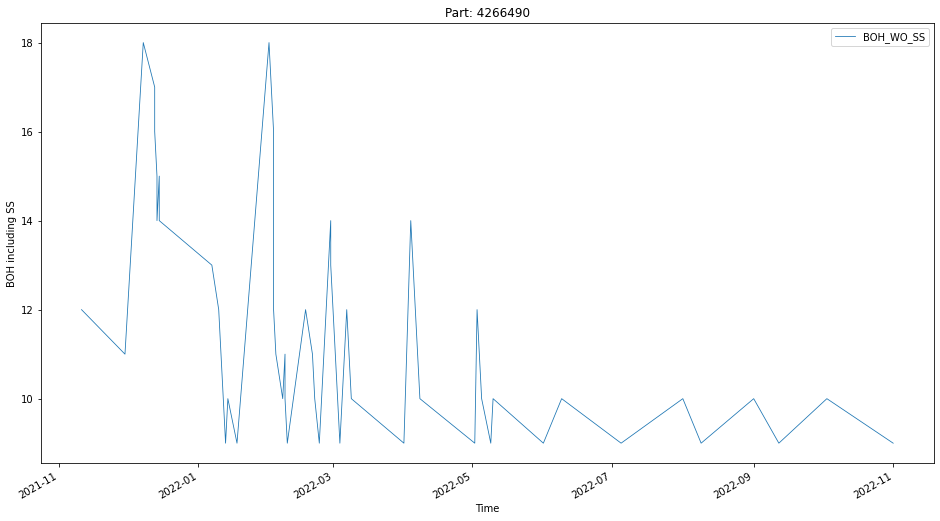

In [4]:
df.plot.line(x = 'TIME_NEEDED', y =['BOH_WO_SS'] , title="Part: 4266490",linewidth=.8, figsize=(16,9));
plot.ylabel('BOH including SS')
plot.xlabel('Time')
plot.show(block=True);

In [5]:
df[df['AVAILABLE_DATE'].notnull()].BOH_WO_SS.describe()

count    15.000000
mean     13.400000
std       2.823372
min      11.000000
25%      11.000000
50%      13.000000
75%      15.000000
max      19.000000
Name: BOH_WO_SS, dtype: float64